## Checking for missing values

In [88]:
import pandas as pd
# Read the final dataset
df = pd.read_csv("../data/final_data_2000_2019.csv")
df.head()

,Country Name,Year,Mortality rate under-5,Population living in slums percentage,GDP per capita,"Secondary education, pupils female percentage",Population density (people per sq. km of land area),People using safely managed drinking water services percentage,Current health expenditure percentage
0,Afghanistan,2000,131.7,NaN,1617.826475,NaN,30.863847,11.093326,NaN
1,Afghanistan,2001,127.4,NaN,1454.110782,0.00000,31.099929,11.105221,NaN
2,Afghanistan,2002,123.1,NaN,1774.308743,NaN,32.776961,12.007733,9.443391
3,Afghanistan,2003,118.7,NaN,1815.928200,24.44685,34.854344,12.909922,8.941258
4,Afghanistan,2004,114.2,NaN,1776.918207,16.27781,36.123230,13.818684,9.808474


In [89]:
# Performing missing value checks for the other columns
missing_data_cleaned = df.isnull().mean()
print("Missing data percentages after dropping high-missing columns:")
print(missing_data_cleaned[missing_data_cleaned > 0])

Missing data percentages after dropping high-missing columns:
Mortality rate under-5                                            0.077679
Population living in slums percentage                             0.618220
GDP per capita                                                    0.076356
Secondary education, pupils female percentage                     0.325647
Population density (people per sq. km of land area)               0.015120
People using safely managed drinking water services percentage    0.380646
Current health expenditure percentage                             0.107352
dtype: float64


In [90]:
# Since population in slums has over 50% missing values, we will drop this column
df_cleaned = df.drop(columns=['Population living in slums percentage'])
print("Dropped Population living in slums percentage column due to high missing values.")

Dropped Population living in slums percentage column due to high missing values.


In [91]:
# Identify countries that have over 30% missing values
country_missing_data = df_cleaned.groupby('Country Name').apply(lambda x: x.isnull().mean())
countries_to_drop = country_missing_data[country_missing_data > 0.3].dropna(how='all').index.tolist()
print(f"Countries to drop (>{30}% missing): {countries_to_drop}")
print(f"Number of countries to drop: {len(countries_to_drop)}")
# Drop these countries from the dataframe
df_cleaned = df_cleaned[~df_cleaned['Country Name'].isin(countries_to_drop)]

Countries to drop (>30% missing): ['Africa Eastern and Southern', 'Africa Western and Central', 'Algeria', 'American Samoa', 'Angola', 'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Azerbaijan', 'Bahamas, The', 'Barbados', 'Belarus', 'Belize', 'Benin', 'Bermuda', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'British Virgin Islands', 'Brunei Darussalam', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Caribbean small states', 'Cayman Islands', 'Central African Republic', 'Channel Islands', 'China', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Djibouti', 'Dominica', 'Early-demographic dividend', 'East Asia & Pacific (IDA & IBRD countries)', 'East Asia & Pacific (excluding high income)', 'Egypt, Arab Rep.', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Faroe Islands', 'Fiji', 'French Polynesia', 'Gabon', 'Gambia, The', 'Gibraltar', 'Greenland', 'Guam', 'Guinea', 'Guine

/var/folders/yk/c0cfqj715njfdnphhzw8m5p00000gn/T/ipykernel_73023/1983354458.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  country_missing_data = df_cleaned.groupby('Country Name').apply(lambda x: x.isnull().mean())


In [92]:
len(df_cleaned)

2200

In [93]:
len(df_cleaned['Country Name'].unique())

110

In [94]:
print(df_cleaned['Country Name'].unique())

['Afghanistan' 'Albania' 'Andorra' 'Austria' 'Bahrain' 'Bangladesh'
 'Belgium' 'Bhutan' 'Brazil' 'Bulgaria' 'Canada'
 'Central Europe and the Baltics' 'Chad' 'Chile' 'Colombia' 'Costa Rica'
 'Cyprus' 'Czechia' 'Denmark' 'Dominican Republic' 'East Asia & Pacific'
 'Ecuador' 'Estonia' 'Ethiopia' 'Euro area' 'Europe & Central Asia'
 'Europe & Central Asia (IDA & IBRD countries)'
 'Europe & Central Asia (excluding high income)' 'European Union'
 'Finland' 'Fragile and conflict affected situations' 'France' 'Georgia'
 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'High income' 'Hungary'
 'IDA blend' 'IDA only' 'IDA total' 'Iceland' 'Indonesia'
 'Iran, Islamic Rep.' 'Ireland' 'Israel' 'Italy' 'Jordan' 'Korea, Rep.'
 'Kuwait' 'Kyrgyz Republic' 'Lao PDR' 'Latin America & Caribbean'
 'Latin America & Caribbean (excluding high income)'
 'Latin America & the Caribbean (IDA & IBRD countries)' 'Latvia'
 'Least developed countries: UN classification' 'Lebanon' 'Lesotho'
 'Lithuania' 'Low & middle

In [95]:
# revisit missing values for the cleaned dataframe
missing_data_final = df_cleaned.isnull().mean()
print("Missing data percentages after cleaning:")
print(missing_data_final[missing_data_final > 0].sort_values(ascending=False))


Missing data percentages after cleaning:
Secondary education, pupils female percentage                     0.120455
People using safely managed drinking water services percentage    0.015909
Population density (people per sq. km of land area)               0.002727
Current health expenditure percentage                             0.000909
dtype: float64


## Missing Data Imputation

Given that the missing data percentages are reasonable, we're looking to impute
- Time series imputation (linear interpolation) for the missing data in "Secondary education, pupils (% female)" with median at the country level.
- Time series imputation (linear interpolation) for missing data in population density: Since population density is a continuous time-series variable, interpolation is best to assume a gradual change between observed years.
- For the percentage-based indicators, the median is safer than the mean as it minimizes the influence of extreme yearly values within a single country so we're using median imputation for "People using safely managed drinking water services percentage" and "Current health expenditure percentage"


In [96]:
# Apply linear interpolation within each country's time series using .transform()
df_cleaned["Secondary education, pupils female percentage"] = (
    df_cleaned.groupby('Country Name')["Secondary education, pupils female percentage"]
    .transform(lambda x: x.interpolate(method='linear'))
)

In [97]:
# Use linear interpolation, grouped by Country Name, to fill missing years
df_cleaned["Population density (people per sq. km of land area)"] = (
    df_cleaned.groupby('Country Name')["Population density (people per sq. km of land area)"]
    .transform(lambda x: x.interpolate(method='linear'))
)

In [98]:
percentage_cols = [
    'People using safely managed drinking water services percentage',
    'Current health expenditure percentage'
]

for col in percentage_cols:
    # Use median imputation, grouped by Country Name
    df_cleaned[col] = (
        df_cleaned.groupby('Country Name')[col]
        .transform(lambda x: x.fillna(x.median()))
    )

## Revisit missing data

In [99]:
print(df_cleaned.isnull().mean())
df_cleaned.head()

Country Name                                                      0.000000
Year                                                              0.000000
Mortality rate under-5                                            0.000000
GDP per capita                                                    0.000000
Secondary education, pupils female percentage                     0.005909
Population density (people per sq. km of land area)               0.002727
People using safely managed drinking water services percentage    0.000000
Current health expenditure percentage                             0.000000
dtype: float64


,Country Name,Year,Mortality rate under-5,GDP per capita,"Secondary education, pupils female percentage",Population density (people per sq. km of land area),People using safely managed drinking water services percentage,Current health expenditure percentage
0,Afghanistan,2000,131.7,1617.826475,NaN,30.863847,11.093326,9.861581
1,Afghanistan,2001,127.4,1454.110782,0.000000,31.099929,11.105221,9.861581
2,Afghanistan,2002,123.1,1774.308743,12.223425,32.776961,12.007733,9.443391
3,Afghanistan,2003,118.7,1815.928200,24.446850,34.854344,12.909922,8.941258
4,Afghanistan,2004,114.2,1776.918207,16.277810,36.123230,13.818684,9.808474


In [100]:
# count number of rows with any missing values
df_cleaned.isnull().any(axis=1).sum()

np.int64(19)

In [101]:
# since the number of rows with any missing values is small, we can drop these rows
df_cleaned = df_cleaned.dropna()

In [102]:
# count number of rows with any missing values after dropping
df_cleaned.isnull().any(axis=1).sum()

np.int64(0)

In [103]:
# Create a new DataFrame with all rows that do not have any missing values
# .dropna(how='any') removes a row if *any* value in that row is NaN
df_final = df_cleaned.dropna(how='any', axis=0).copy()

print(f"Original row count: {len(df_cleaned)}")
print(f"Final complete row count: {len(df_final)}")
print(f"Number of rows dropped: {len(df_cleaned) - len(df_final)}")

Original row count: 2181
Final complete row count: 2181
Number of rows dropped: 0


## Check distribution of all attributes

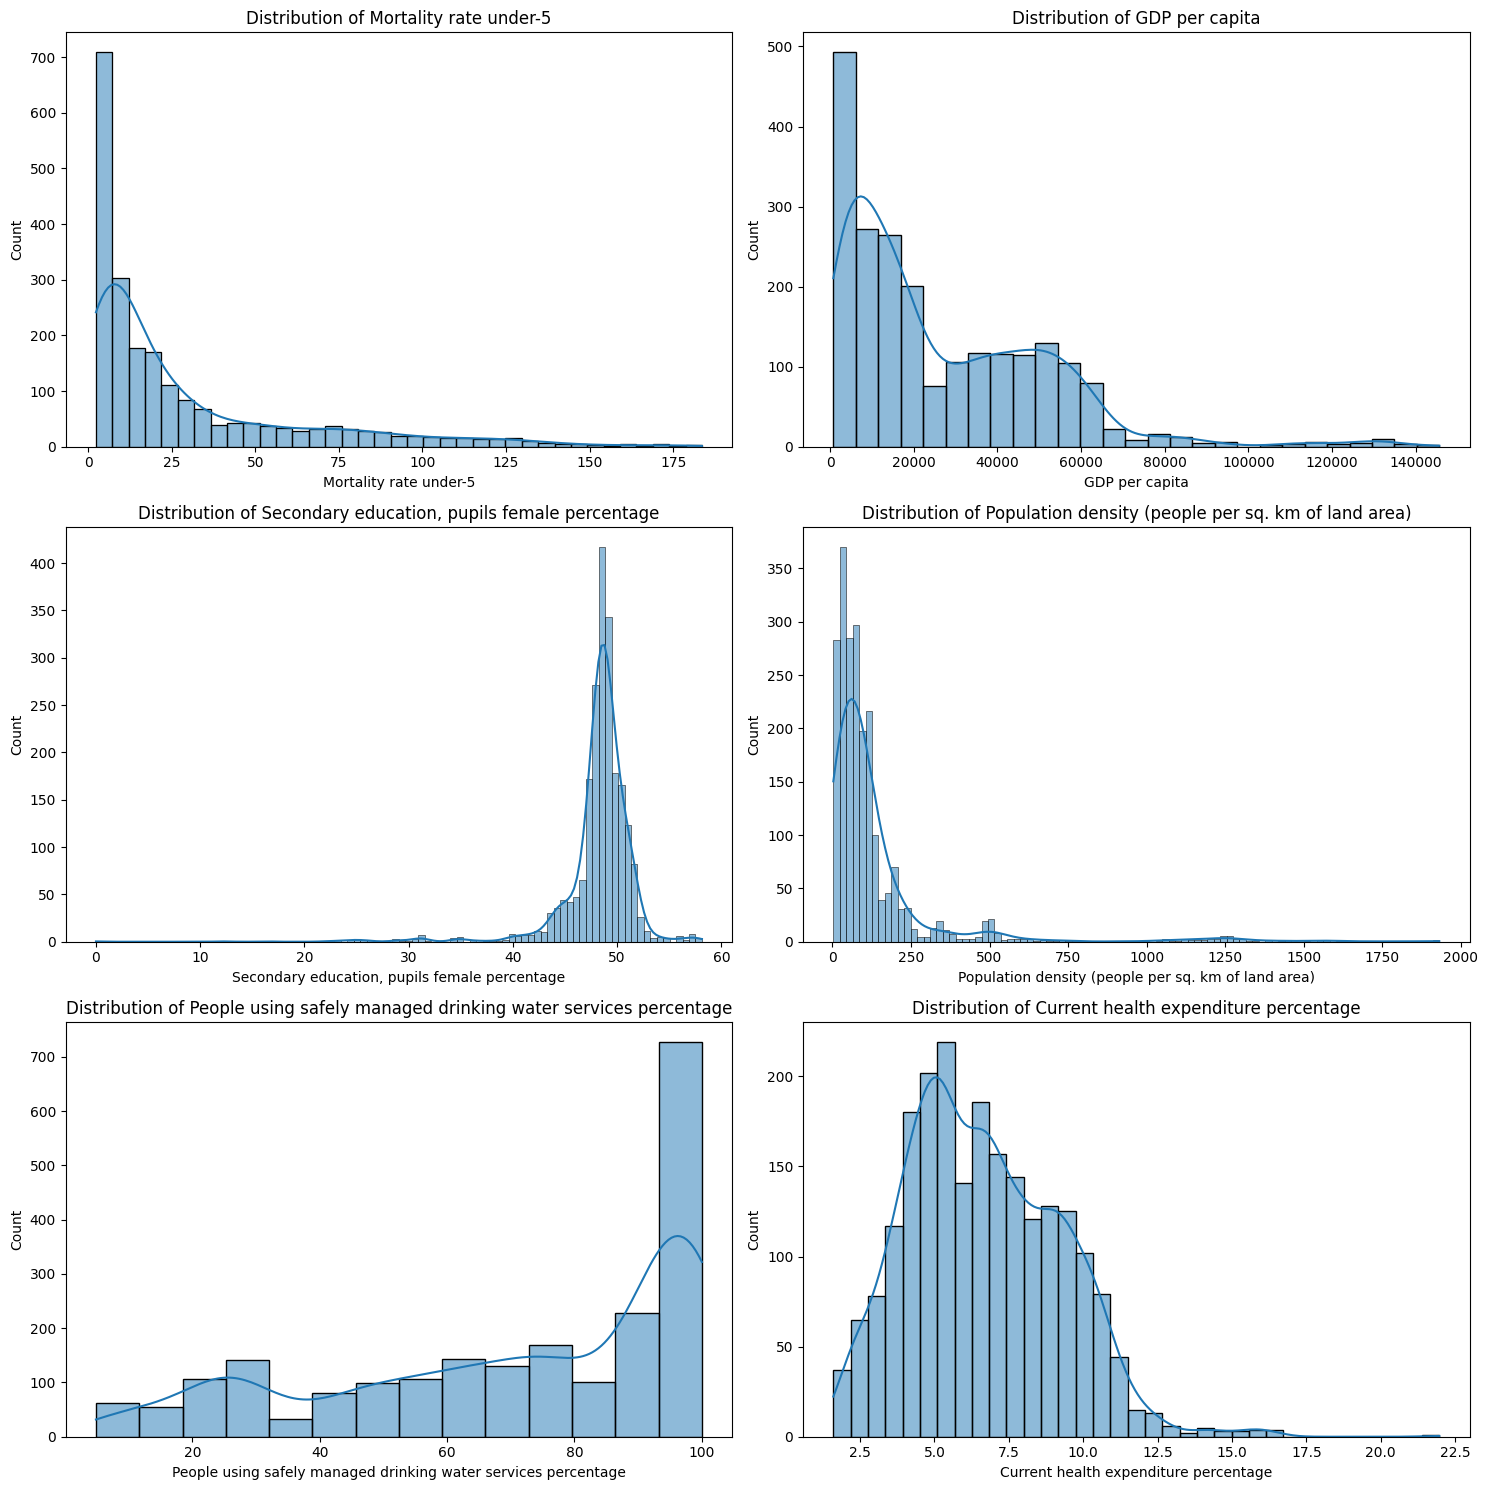

In [104]:
# check distribution of all attributes except Country Name and Year
# plot histograms for all columns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
num_cols = df_final.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove('Year')  # Exclude Year from the plots
num_plots = len(num_cols)
num_rows = math.ceil(num_plots / 2)  # 2 plots per row
plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(num_cols):
    plt.subplot(num_rows, 2, i + 1)
    sns.histplot(df_final[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


As indicated in the plots above, the following attributes are extremely right skewed:
1. GDP per capita
2. Population density
3. Child mortality rate

Using log transformation for these aforementioned attributes using `log(1+x)` (or np.log1p) because many density values are close to zero, `log(0)` is undefined.

Current health expenditure percentage has a mild positive right skew, square root transformation is often ideal for mild positive skew as it's gentler than the log and can stabilize variance.

People using safely managed drinking water services percentage is extremely negatively left skewed, a logit transformation would be appropriate to use

Secondary education, pupils female percentage is heavily left skewed but it has a bell shaped curve so likely recentering it and doing a log transformation could suffice.

In [106]:
import numpy as np
import pandas as pd

# --- 1. Transformations for POSITIVE (Right) Skew (Using log(1+x) for uniformity) ---

# These variables are heavily skewed to the right (concentrated at low values).
# log(1+x) is used for uniformity and robustness against zero/near-zero values.
print("Applying log(1+x) to positively skewed variables...")

positive_skew_cols = [
    'GDP per capita',
    'Population density (people per sq. km of land area)',
    'Mortality rate under-5'
]

for col in positive_skew_cols:
    new_col_name = 'log_' + col.replace(' ', '_').replace('(', '').replace(')', '').replace('.', '')
    df_cleaned[new_col_name] = np.log1p(df_cleaned[col])

# Drop original positively skewed columns
df_cleaned = df_cleaned.drop(columns=positive_skew_cols)


# --- 2. Transformation for NEGATIVE (Left) Skew (Secondary Education) ---

# This distribution is clustered at high values. We use Reflection + Log.
sec_edu_col = 'Secondary education, pupils female percentage'
val = df_cleaned[sec_edu_col].max()

reflection_constant = val + 1 # as log(0) is undefined

print("Applying Reflection and Log to negatively skewed Secondary Education...")
df_cleaned['log_reflected_secondary_education'] = np.log1p(reflection_constant - df_cleaned[sec_edu_col])

# Drop original negatively skewed column
df_cleaned = df_cleaned.drop(columns=[sec_edu_col])


# --- 3. Transformation for BOUNDED RATIO (Water Services) ---

# This percentage data is bounded (0-100) and bimodal/left-skewed. Logit is the best fit.
# Logit formula: log(p / (1-p)), where p is the proportion (value/100).
print("Applying Logit transformation to Water Services percentage...")

water_col = 'People using safely managed drinking water services percentage'

# Convert percentage to proportion (0 to 1)
proportion = df_cleaned[water_col] / 100

# Handle edge cases (p=0 or p=1) by clipping, as logit is undefined at the boundaries.
# Clipping to a small epsilon prevents log(0) or log(inf).
epsilon = 1e-4 # A small positive value (0.0001)
proportion_adj = np.clip(proportion, epsilon, 1 - epsilon)

# Apply the Logit transformation
df_cleaned['logit_water_services'] = np.log(proportion_adj / (1 - proportion_adj))

# Drop the original water services column
df_cleaned = df_cleaned.drop(columns=[water_col])

# --- 4. Transformation for MILD POSITIVE SKEW (Health Expenditure) ---

# This is a mild positive skew, making the Square Root transformation appropriate.
print("Applying Square Root transformation to Health Expenditure...")

health_col = 'Current health expenditure percentage'
df_cleaned['sqrt_health_expenditure'] = np.sqrt(df_cleaned[health_col])

# Drop the original health expenditure column
df_cleaned = df_cleaned.drop(columns=[health_col])

print("\nAll transformations complete. The new transformed features have been added as columns.")

Applying log(1+x) to positively skewed variables...
Applying Reflection and Log to negatively skewed Secondary Education...
Applying Logit transformation to Water Services percentage...
Applying Square Root transformation to Health Expenditure...

All transformations complete. The new transformed features have been added as columns.


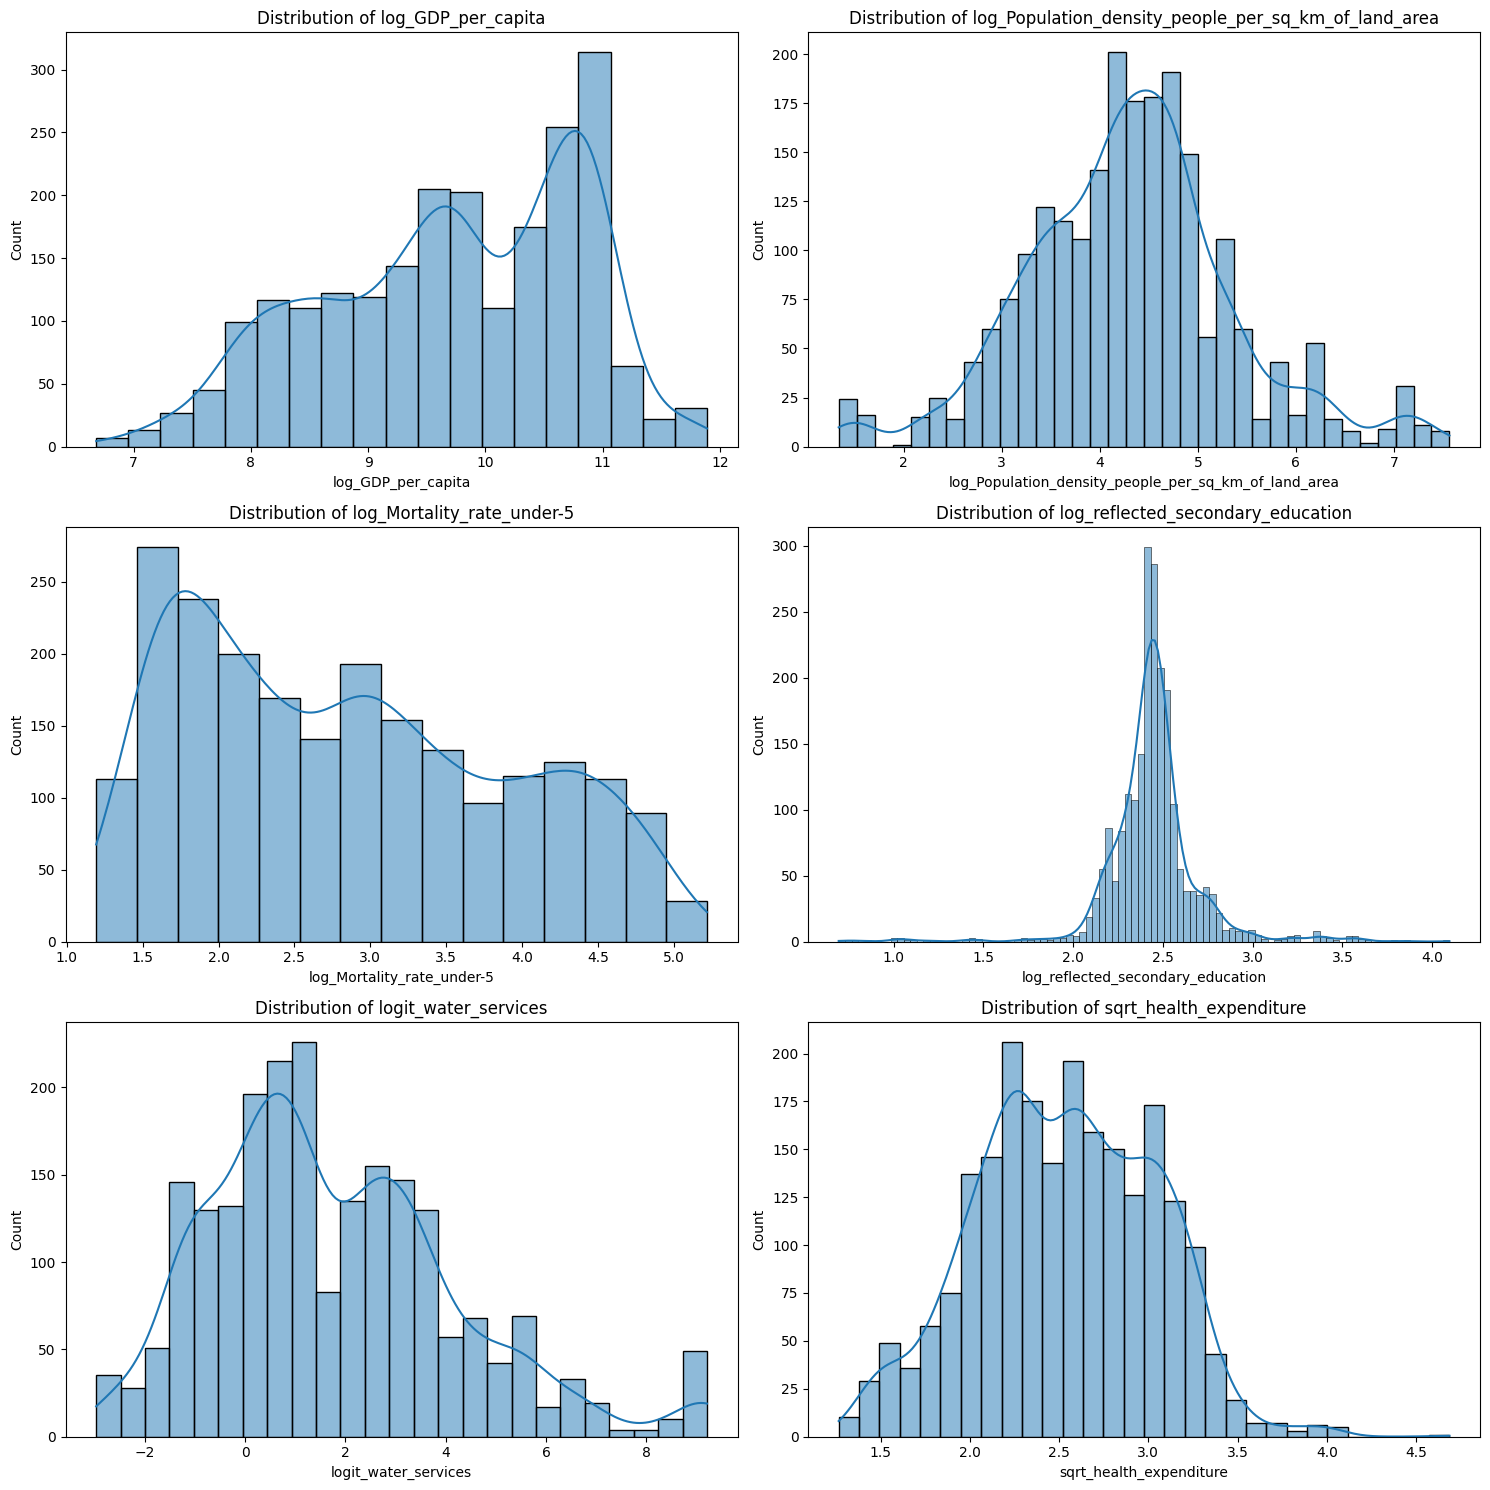

In [107]:
# check distribution of all attributes except Country Name and Year
# plot histograms for all columns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
num_cols = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove('Year')  # Exclude Year from the plots
num_plots = len(num_cols)
num_rows = math.ceil(num_plots / 2)  # 2 plots per row
plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(num_cols):
    plt.subplot(num_rows, 2, i + 1)
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


In [111]:
# Since our response variable is still somewhat right-skewed, using Box-Cox transformation

from scipy.stats import boxcox
import pandas as pd

# Apply the Box-Cox transformation
transformed_data, lambda_value = boxcox(df_cleaned['log_Mortality_rate_under-5'])
df_cleaned['boxcox_mortality'] = transformed_data

# Drop the original response variable column as it is no longer needed
df_cleaned = df_cleaned.drop(columns=['log_Mortality_rate_under-5'])

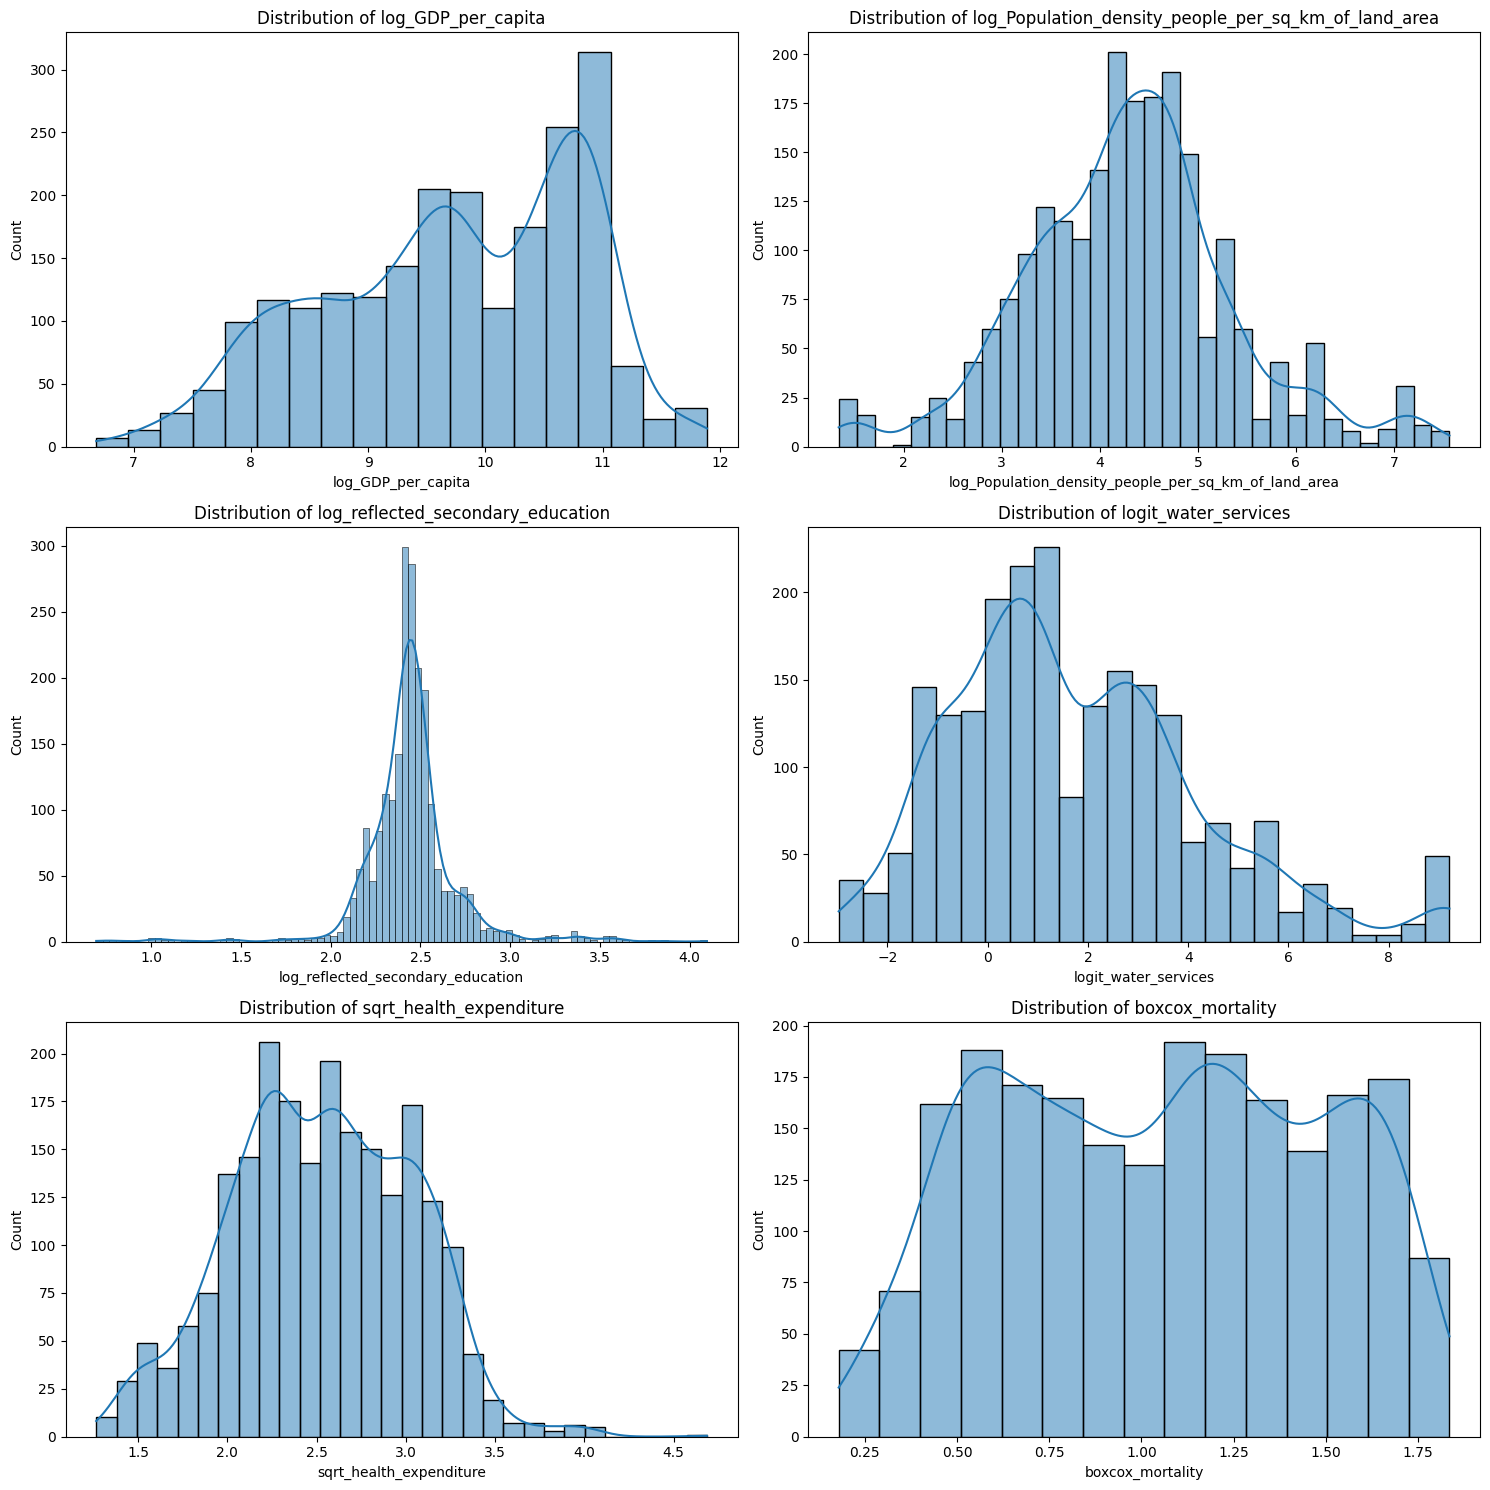

In [112]:
# check distribution of all attributes except Country Name and Year
# plot histograms for all columns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
num_cols = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove('Year')  # Exclude Year from the plots
num_plots = len(num_cols)
num_rows = math.ceil(num_plots / 2)  # 2 plots per row
plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(num_cols):
    plt.subplot(num_rows, 2, i + 1)
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()
